### This notebook uses the Global Terrorism - START data CSV dataset to analyse the behavior of terrorism in the world in the period from 1970 to 2015 & to analyse the behaviour of top terrorist groups (Preferred weapons , Preferred target type , ... etc ).

The Questions this notebook answers: <br>

1  - Number of Attacks Per Region <br>
2  - Global Terrorism - Number Of Attacks Per country (All Over The World) <br>
3  - Number of People Killed by Their Nationality <br>
4  - Number of Attacks Per Provstate (Primary Subnational Administrative Division) <br>
5  - Number of Attacks & Suicides Per Year (1970 - 2015) <br>
6  - Number Of Attacks Per Target Types (1970-2017) <br>
7  - Number Of Attacks By Country (Countries That Have More Than 500 Attacks) <br>
8  - Terrorist Attacks by Type (1970-2017) <br>
9  - Suicide by Country (1970-2017) "Countries that have more than 1000 Suicides" <br>
10 - Cases over Time (Total , Suicide , Extended , Succeeded ) Attacks Per Year. <br>
11 - Number of Attacks For Each Group Per Year <br>
12 - Number of Attacks Per Region Per Year <br>
13 - Number of Attacks For Top Groups Per Year & Their Success Rate & Rate For Different Behaviour & Rate For Multiple Attacks <br>
14 - Number of Attack Per Each Target Type For Each Group (Top Groups) <br>
15 - Number of Attack Per Each Weapon Type For Each Group (Top Groups) <br>
16 - Number of Citizens Killed & Terrorist Killed For Top Groups Per Group (Top Groups) <br>
17 - Number of Attacks Per Nationality For Each Group

In [91]:
#!pip install gitly

# Import Libiraries And Read The Data

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
from gitly.colab.plot import GitlyPlotter

In [93]:
data = pd.read_csv('F:\Projects\Graduate Rotational Internship Program The Sparks Foundation\Global Terrorism - START data (Intermideate)\globalterrorismdb_0718dist.csv')

F:\Anaconda\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



# Little Data Preprocessing

In [94]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [95]:
cols = []
for col in data.columns:
    print(col , data[col].isna().sum())
    if data[col].isna().sum() > (data.shape[0] / 2): # columns that have more empty rows than half of the dataset "Useless cols"
        print('####### Drop ' + col)
        cols.append(col)

eventid 0
iyear 0
imonth 0
iday 0
approxdate 172452
####### Drop approxdate
extended 0
resolution 179471
####### Drop resolution
country 0
country_txt 0
region 0
region_txt 0
provstate 421
city 434
latitude 4556
longitude 4557
specificity 6
vicinity 0
location 126196
####### Drop location
summary 66129
crit1 0
crit2 0
crit3 0
doubtterr 1
alternative 152680
####### Drop alternative
alternative_txt 152680
####### Drop alternative_txt
multiple 1
success 0
suicide 0
attacktype1 0
attacktype1_txt 0
attacktype2 175377
####### Drop attacktype2
attacktype2_txt 175377
####### Drop attacktype2_txt
attacktype3 181263
####### Drop attacktype3
attacktype3_txt 181263
####### Drop attacktype3_txt
targtype1 0
targtype1_txt 0
targsubtype1 10373
targsubtype1_txt 10373
corp1 42550
target1 636
natlty1 1559
natlty1_txt 1559
targtype2 170547
####### Drop targtype2
targtype2_txt 170547
####### Drop targtype2_txt
targsubtype2 171006
####### Drop targsubtype2
targsubtype2_txt 171006
####### Drop targsubtype2_t

In [96]:
cols , len(cols) # We got 77 columns that are empty enough to drop

(['approxdate',
  'resolution',
  'location',
  'alternative',
  'alternative_txt',
  'attacktype2',
  'attacktype2_txt',
  'attacktype3',
  'attacktype3_txt',
  'targtype2',
  'targtype2_txt',
  'targsubtype2',
  'targsubtype2_txt',
  'corp2',
  'target2',
  'natlty2',
  'natlty2_txt',
  'targtype3',
  'targtype3_txt',
  'targsubtype3',
  'targsubtype3_txt',
  'corp3',
  'target3',
  'natlty3',
  'natlty3_txt',
  'gsubname',
  'gname2',
  'gsubname2',
  'gname3',
  'gsubname3',
  'motive',
  'guncertain2',
  'guncertain3',
  'claimmode',
  'claimmode_txt',
  'claim2',
  'claimmode2',
  'claimmode2_txt',
  'claim3',
  'claimmode3',
  'claimmode3_txt',
  'compclaim',
  'weaptype2',
  'weaptype2_txt',
  'weapsubtype2',
  'weapsubtype2_txt',
  'weaptype3',
  'weaptype3_txt',
  'weapsubtype3',
  'weapsubtype3_txt',
  'weaptype4',
  'weaptype4_txt',
  'weapsubtype4',
  'weapsubtype4_txt',
  'propextent',
  'propextent_txt',
  'propvalue',
  'propcomment',
  'nhostkid',
  'nhostkidus',
  'nh

In [97]:
data['approxdate'].isna().sum()

172452

🛑 There Are 77 columns that we should avoid using , So we will drop them

In [98]:
data.drop(cols , axis = 1 , inplace = True)

In [99]:
data.shape # We reduce or data columns from  135 to 58

(181691, 58)

In [100]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [101]:
'''
Make sure that every column has a suitable number of missing values. There are some columns that still have a large number of 
missing values, like "Summary , corp1 , nperps , weapdetail ,weapsubtype1" But we will not use them in our analysis.
'''
for col in data.columns:
    print(col , data[col].isna().sum())

eventid 0
iyear 0
imonth 0
iday 0
extended 0
country 0
country_txt 0
region 0
region_txt 0
provstate 421
city 434
latitude 4556
longitude 4557
specificity 6
vicinity 0
summary 66129
crit1 0
crit2 0
crit3 0
doubtterr 1
multiple 1
success 0
suicide 0
attacktype1 0
attacktype1_txt 0
targtype1 0
targtype1_txt 0
targsubtype1 10373
targsubtype1_txt 10373
corp1 42550
target1 636
natlty1 1559
natlty1_txt 1559
gname 0
guncertain1 380
individual 0
nperps 71115
nperpcap 69489
claimed 66120
weaptype1 0
weaptype1_txt 0
weapsubtype1 20768
weapsubtype1_txt 20768
weapdetail 67670
nkill 10313
nkillus 64446
nkillter 66958
nwound 16311
nwoundus 64702
nwoundte 69143
property 0
ishostkid 178
scite1 66191
dbsource 0
INT_LOG 0
INT_IDEO 0
INT_MISC 0
INT_ANY 0


In [102]:
"""Generated By GPT
cols_to_drop = ['eventid', 'approxdate', 'extended', 'resolution', 'country', 'region', 'provstate', 'city', 'latitude', 
                'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 
                'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype2', 'attacktype2_txt', 
                'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 
                'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 
                'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'guncertain1',
                'guncertain2', 'guncertain3', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 
                'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 
                'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 
                'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'propextent', 'propextent_txt', 'propvalue',
                'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 
                'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt',
                'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
                """;

# Some Basic Analysis

🛑 Some columns are not clear in terms of their meaning. Let's use ChatGPT 🤖 to clarify these columns and understand what they mean.

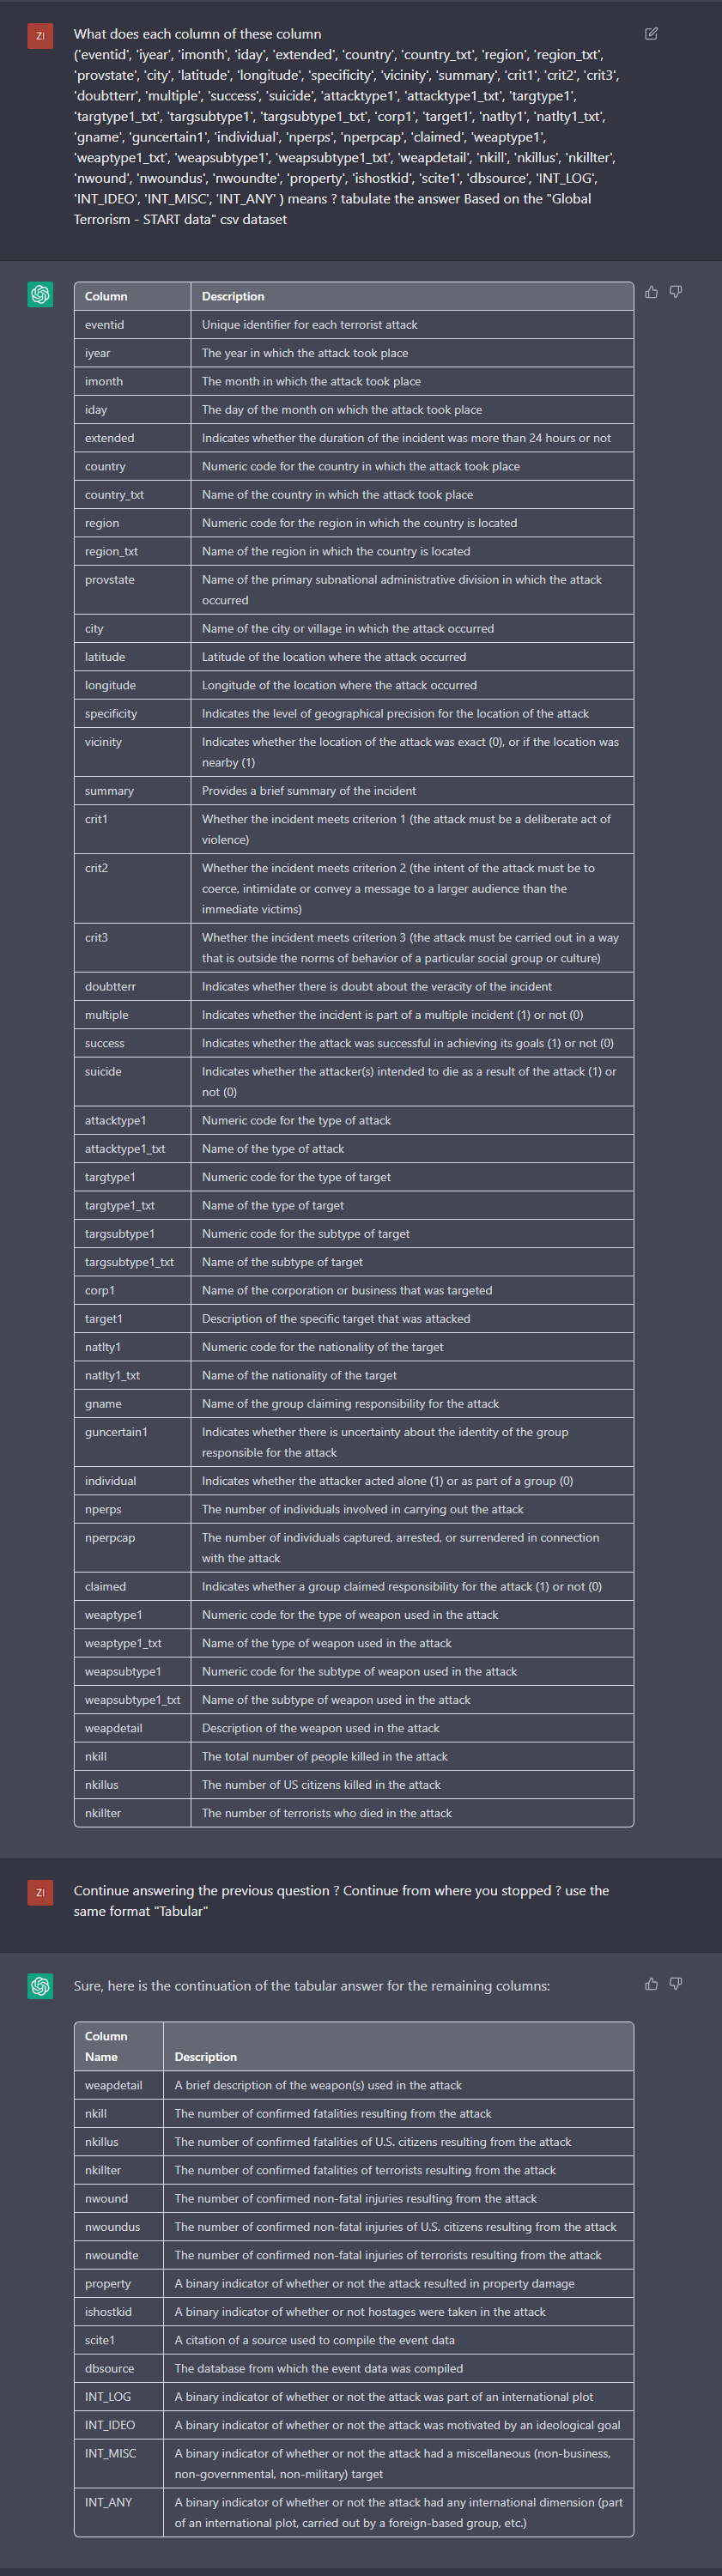

In [103]:
from IPython.core.display import Image, display
display(Image('chatGPT.PNG' , unconfined=True))

🛑 There are a huge number of columns to investigate, so let's use ChatGPT 🤖 to help us identify what we should expect from this dataset.

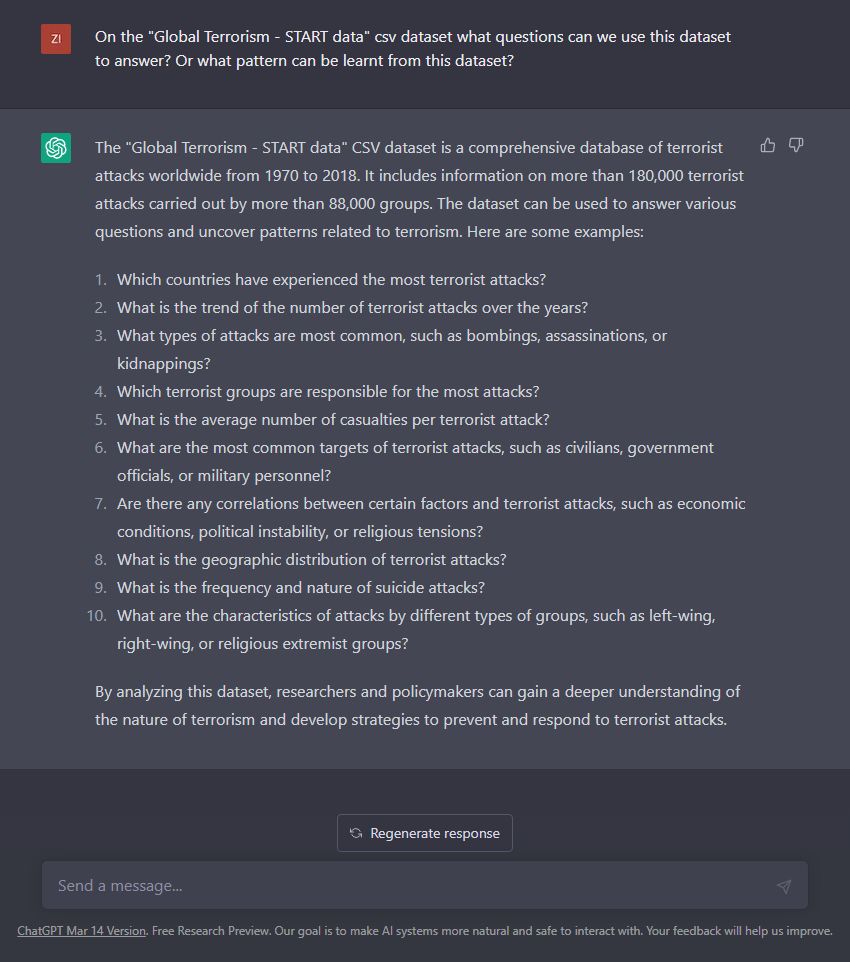

In [104]:
from IPython.core.display import Image, display
display(Image('chatGPT2.PNG' , unconfined=True))

In [105]:
#All Attacks per year "We will need it too much in our analysis".
all_attacks = data.groupby('iyear')['eventid'].count().reset_index()
all_attacks.head()

,iyear,eventid
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


### Q1  - Number of Attacks Per Region

In [106]:
fig = px.bar(data.groupby('region_txt')['eventid'].count().reset_index() , x = 'region_txt' , y = 'eventid' ,  
             color = "eventid" , title = "Number of Attacks Per Region")
fig.update_layout(xaxis_title = 'Region' , yaxis_title = 'Number Of Attacks')
fig.show()

### Q2  - Global Terrorism - Number Of Attacks Per country (All Over The World)

In [107]:
attacks_per_country = data.groupby('country_txt')['eventid'].count().reset_index()
attacks_per_country.columns = ['country_txt' , 'Number Of Attacks']
fig1 = px.choropleth(attacks_per_country , 
                    locations = 'country_txt' ,
                    locationmode = 'country names' ,
                    color = 'Number Of Attacks' ,
                    hover_name = 'country_txt' ,
                    projection = 'natural earth')
fig1.update_layout(title_text = 'Global Terrorism - Number Of Attacks Per country')

fig1.show()

### Q3  - Number of People Killed by Their Nationality

In [108]:
Nationality = data.groupby(['natlty1_txt'])['eventid'].count().reset_index().sort_values(by = 'eventid' , ascending = False)[:40]
fig2 = px.bar(Nationality , x = 'natlty1_txt' , y = 'eventid' , 
              title = "Number of People Killed by Their Nationality")
fig2.update_layout(xaxis_title = 'Nationality' , yaxis_title = 'Number Of Kills')
fig2.show()

### Q4  - Number of Attacks Per Provstate (Primary Subnational Administrative Division)

In [109]:
prov = data.groupby('provstate')['eventid'].count().reset_index().sort_values(by = 'eventid' , ascending = False)[:50]
fig3 = px.bar(prov , x = 'provstate' , y = 'eventid' , 
              title = "Number of Attacks Per Provstate (Primary Subnational Administrative Division)")
fig3.update_layout(xaxis_title = 'Provstate' , yaxis_title = 'Number Of Attacks')
fig3.show()

### Q5  - Number of Attacks & Suicides Per Year (1970 - 2015)

In [110]:
# Create subplots with 1 row and 1 column
suicide_year = data.groupby('iyear')['suicide'].sum().reset_index()

fig4 = make_subplots(rows = 1 , cols = 2 , subplot_titles = ("Number Of Attacks", "Number Of Sucides"))

attacks_per_year = go.Bar(x = all_attacks['iyear'] , y = all_attacks['eventid'] , name = 'Attacks')
suicide_per_year = go.Bar(x = suicide_year['iyear'] , y = suicide_year['suicide'] , name = 'Sucides')


fig4.add_trace(attacks_per_year ,  row = 1 , col = 1)
fig4.add_trace(suicide_per_year ,  row = 1 , col = 2)




fig4.update_layout(barmode = 'group' , title_text = "Number of Attacks & Suicides Per Year (1970 - 2015)")
fig4.update_xaxes(title_text = "Year")
fig4.update_yaxes(title_text = "Number of Cases" , secondary_y = False)

fig4.show()

🛑 Number of terrorist attacks increased in 2014 "interesting" and fades in nearly 1993 and number of sucide increased in 2016

### Q6  - Number Of Attacks Per Target Types (1970-2017)

In [111]:
target_type = data.groupby('targtype1_txt')['eventid'].count()
attack_region = data.groupby('region_txt')['eventid'].count()

fig5 = px.bar(target_type , x = target_type.index , y = target_type)
fig5.update_layout(title='Number Of Attacks Per Target Types (1970-2017)',
                  xaxis_title='Target Type Of Attack',
                  yaxis_title='Number Of Attacks')

fig5.show()

### Q7  - Number Of Attacks By Country (Countries That Have More Than 500 Attacks)

In [112]:
attacks_per_country.columns = ['Country', 'Attacks']
attacks_per_country = attacks_per_country[attacks_per_country['Attacks'] > 500]


fig6 = px.scatter(attacks_per_country, x='Country', y='Attacks', size='Attacks',
                 color='Attacks', color_continuous_scale=px.colors.sequential.Plasma,
                 hover_name='Country', labels={'Attacks': 'Number of Attacks', 'Country': 'Country'},
                 template='plotly_white', size_max = 80)

# Add text labels to the plot
for i, row in attacks_per_country.iterrows():
    fig6.add_annotation(x=row['Country'], y=row['Attacks'], text=row['Country'],
                       font=dict(size=10, color='black'), showarrow=False)

# Update the plot layout
fig6.update_layout(title='Number Of Attacks By Country (Countries That Have More Than 500 Attacks)',
                  xaxis_title='',
                  yaxis_title='Number Of Attacks',
                  plot_bgcolor='white')

# Hide the x-axis tick labels
fig6.update_xaxes(showticklabels=False)

# Set the size of the plot
fig6.update_layout(width=1000, height=800)

# Show the plot
fig6.show()

### Q8  - Terrorist Attacks by Type (1970-2017)

In [113]:
attacks_type = data.groupby('attacktype1_txt')['eventid'].count().reset_index()


fig7 = px.scatter(attacks_type, x='attacktype1_txt', y='eventid', size='eventid',
                 color='eventid', color_continuous_scale=px.colors.sequential.Plasma,
                 hover_name='attacktype1_txt', labels={'eventid': 'Number of Attacks', 'attacktype1_txt': 'Country'},
                 template='plotly_white', size_max = 80)

# Add text labels to the plot
for i, row in attacks_type.iterrows():
    fig7.add_annotation(x=row['attacktype1_txt'], y=row['eventid'], text=row['attacktype1_txt'],
                       font=dict(size=10, color='black'), showarrow=False)

# Update the plot layout
fig7.update_layout(title='Terrorist Attacks by Type (1970-2017)',
                  xaxis_title='',
                  yaxis_title='Number Of Attacks',
                  plot_bgcolor='white')

# Hide the x-axis tick labels
fig7.update_xaxes(showticklabels=False)

# Set the size of the plot
fig7.update_layout(width=900, height=800)

# Show the plot
fig7.show()

### Q9  - Suicide by Country (1970-2017) "Countries that have more than 1000 Suicides"

In [114]:
suicide_country = data.groupby('country_txt')['suicide'].count().reset_index()
suicide_country.columns = ['Country', 'Suicde']
suicide_country = suicide_country[suicide_country['Suicde'] > 1000]

fig8 = px.scatter(suicide_country, x='Country', y='Suicde', size='Suicde',
                 color='Suicde', color_continuous_scale=px.colors.sequential.Plasma,
                 hover_name='Country', labels={'Suicide': 'Number of suicides', 'Country': 'Country'},
                 template='plotly_white', size_max = 80)

# Add text labels to the plot
for i, row in suicide_country.iterrows():
    fig8.add_annotation(x=row['Country'], y=row['Suicde'], text=row['Country'],
                       font=dict(size=10, color='black'), showarrow=False)

# Update the plot layout
fig8.update_layout(title='Suicide by Country (1970-2017) "Countries that have more than 1000 Suicides"',
                  xaxis_title='',
                  yaxis_title='Number of suicides',
                  plot_bgcolor='white')

# Hide the x-axis tick labels
fig8.update_xaxes(showticklabels=False)

# Set the size of the plot
fig8.update_layout(width=1000, height=800)

# Show the plot
fig8.show()

### Q10 - Cases over Time (Total , Suicide , Extended , Succeeded ) Attacks Per Year

In [115]:
suicide     = data.groupby('iyear')['suicide'].sum().reset_index()
extended    = data.groupby('iyear')['extended'].sum().reset_index()
success     = data.groupby('iyear')['success'].sum().reset_index()

total_cases = go.Scatter(x=all_attacks['iyear'], y=all_attacks['eventid'], mode='lines', name='Total cases')
suicide_cases = go.Scatter(x=suicide['iyear'], y=suicide['suicide'], mode='lines', name='Success cases')
extended_cases = go.Scatter(x=extended['iyear'], y=extended['extended'], mode='lines', name='Extended cases')
success_cases = go.Scatter(x=success['iyear'], y=success['success'], mode='lines', name='Suicide cases')

# Add traces to a single Figure object
fig9 = go.Figure(data=[total_cases, success_cases, extended_cases, suicide_cases])
fig9.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='Cases')
fig9.show()

# Deeper Analysis (This Analysis Focuses More On The Top Terrorist Groups' Attacks)

### Q12 - Number of Attacks For Each Group Per Year

In [116]:
groups = data.groupby('gname')['eventid'].count().reset_index().sort_values(by = 'eventid' , ascending = False)['gname'][:20]
columns = ['iyear', 'gname', 'eventid']

filtered_data = data[columns][data['gname'].isin(groups)]

# Group the data by year and group name, and count the number of attacks
grouped_data = filtered_data.groupby(['iyear' , 'gname']).count().reset_index()

# Plot the data using Plotly
fig10 = px.line(grouped_data , x = 'iyear' , y = 'eventid' , color = 'gname')
fig10.update_layout(xaxis_title = "Year" , yaxis_title = "Number Of Attacks" , legend_title = 'Name Of The Group' ,
                   legend_traceorder = "reversed" , title_text = "Number of Attacks For Each Group Per Year" , width = 900 ,
                   height = 600 , paper_bgcolor = "LightSteelBlue")
fig10.show()

### Q12 - Number of Attacks Per Region Per Year

🛑 We saw that most attacks are in the Middle East & North Africa (Figure 1), but was that the case a long time ago? Let's See.

In [117]:
region = data.groupby('region_txt')['eventid'].count().reset_index().sort_values(by = 'eventid' , ascending = False)['region_txt']
columns_region = ['iyear', 'region_txt', 'eventid']
filtered_data_region = data[columns_region][data['region_txt'].isin(region)]

# Group the data by year and group name, and count the number of attacks
grouped_data_region = filtered_data_region.groupby(['iyear' , 'region_txt']).count().reset_index()

# Plot the data using Plotly
fig11 = px.bar(grouped_data_region , x = 'iyear' , y = 'eventid' , color = 'region_txt')
fig11.update_layout(xaxis_title = "Year" , yaxis_title = "Number Of Attacks" , legend_title = 'Regions' ,
                   title_text = "Number of Attacks Per Region Per Year" , width = 900 ,
                   height = 600 , paper_bgcolor = "LightSteelBlue")
fig11.show()

🛑 From 1980 to 1990, most attacks were in south america or Central America & the Caribbean region. Then it fades out and another trend appears from 2005 to 2017: the attacks were most common in both South Asia and the Middle East & North Africa

### Q13 - Number of Attacks For Top Groups Per Year & Their Success Rate & Rate For Different Behaviour & Rate For Multiple Attacks

In [118]:
#All And Succeeded Attacks
all_attacks = data.groupby('gname')['eventid'].count().reset_index().sort_values(by = 'eventid' , ascending = False)[1:15]
succeeded_attacks = data.groupby('gname')['success'].sum().reset_index()
merged_s_attacks = pd.merge(all_attacks , succeeded_attacks , on = 'gname')
merged_s_attacks["success_rate"] = merged_s_attacks["success"] * 100 / merged_s_attacks["eventid"]

In [119]:
#Different Behaviour Attacks "If the attack used different beachiour from the group main behaviour"
differenet_attacks = data.groupby('gname')['crit3'].sum().reset_index()
merged_d_attacks = pd.merge(all_attacks , differenet_attacks , on = 'gname')
merged_d_attacks["differ_rate"] = merged_d_attacks["crit3"] * 100 / merged_d_attacks["eventid"]

In [120]:
#Multiple Attacks "If the attack is part of a multiple attack"
multiple_attacks = data.groupby('gname')['multiple'].sum().reset_index()
merged_m_attacks = pd.merge(all_attacks , multiple_attacks , on = 'gname')
merged_m_attacks["multiple_rate"] = merged_m_attacks["multiple"] * 100 / merged_m_attacks["eventid"]

In [121]:
# Create subplots with 1 row and 1 column
fig12 = make_subplots(rows=1, cols=1)

success = go.Bar(x=merged_s_attacks["gname"], y=merged_s_attacks["success"] , name = 'Success')
all_atk = go.Bar(x=all_attacks["gname"], y=all_attacks["eventid"] , name = 'Total Cases')
dif  = go.Bar(x=merged_d_attacks["gname"], y=merged_d_attacks["crit3"] , name = 'Different Behaviour')
mult = go.Bar(x=merged_m_attacks["gname"], y=merged_m_attacks["multiple"] , name = 'Multiple')

line_success_rate = go.Scatter(x = merged_s_attacks["gname"] , y = merged_s_attacks["success_rate"] , 
                               mode = 'lines' , name = 'Success rate')
line_differ_rate = go.Scatter(x = merged_d_attacks["gname"] , y = merged_d_attacks["differ_rate"] , 
                              mode = 'lines' , name = 'Differ rate')
line_multi_rate = go.Scatter(x = merged_m_attacks["gname"] , y = merged_m_attacks["multiple_rate"] , 
                              mode = 'lines' , name = 'Multi rate')

fig12 = make_subplots(specs = [[{"secondary_y": True}]])
fig12.add_trace(all_atk)
fig12.add_trace(success)
fig12.add_trace(dif)
fig12.add_trace(mult)
fig12.add_trace(line_success_rate , secondary_y = True)
fig12.add_trace(line_differ_rate , secondary_y = True)
fig12.add_trace(line_multi_rate , secondary_y = True)



fig12.update_layout(barmode = 'group' , title_text = "Number of Attacks For Top Groups Per Year & Their Success Rate"
                   " & Rate For Different Behaviour & <br>Rate For Multiple Attacks")
fig12.update_xaxes(title_text = "Group Name")
fig12.update_yaxes(title_text = "Number of Cases" , secondary_y = False)
fig12.update_yaxes(title_text = "Success Rate" , secondary_y = True , range = [0 , 100])

fig12.show()

🛑 We can see that Taliban has the most number of cases & FMLN has the highest success rate & CPI Maoist has the highest difeerent rate (I assumably they use different behaviours nearly every time) & BOKO HARAM has the highest multiple rate (I assumably their attacks will repeat alot).

### Q14 - Number of Attack Per Each Target Type For Each Group (Top Groups)

In [122]:
Group_Target = data.groupby(['gname' , 'targtype1_txt'])['eventid'].count().reset_index()
Group_Target_Chart = Group_Target.loc[Group_Target['gname'].isin(list(all_attacks['gname']))]
temp = Group_Target.groupby('gname')['eventid'].sum().reset_index()
Group_Target_Chart = pd.merge(Group_Target_Chart , temp , on = 'gname')
Group_Target_Chart['Percentage'] = Group_Target_Chart['eventid_x'] * 100 / Group_Target_Chart['eventid_y']
Group_Target_Chart['Percentage'] = Group_Target_Chart['Percentage'].round(decimals = 3)

In [123]:
# Plot the data using Plotly
fig13 = px.bar(Group_Target_Chart , x = 'gname' , y = 'eventid_x' , custom_data = ['targtype1_txt' , 'eventid_x' , 'Percentage'] ,  color = 'targtype1_txt')
fig13.update_layout(xaxis_title = "Group Name" , yaxis_title = "Number Of Attacks" , legend_title = 'Type Of Attack' ,
                   title_text = "Number of Attack Per Each Type For Each Group" , width = 900 ,
                   height = 600 , paper_bgcolor = "LightSteelBlue")

fig13.update_traces(
    hovertemplate="<br>".join([
        "targtype1_txt: %{customdata[0]}",
        "# Of Attacks: %{customdata[1]}",
        "Percentage: %{customdata[2]}",
    ])
)
fig13.show()

🛑 We see that Taliban highest percent of attacks are on Police & ISIL are on private citizens and property & FMLN are on military

### Q15 - Number of Attack Per Each Weapon Type For Each Group (Top Groups)

In [124]:
Group_Weapon = data.groupby(['gname' , 'weaptype1_txt'])['eventid'].count().reset_index()
Group_Weapon_Chart = Group_Weapon.loc[Group_Weapon['gname'].isin(list(all_attacks['gname']))]
temp = Group_Weapon.groupby('gname')['eventid'].sum().reset_index()
Group_Weapon_Chart = pd.merge(Group_Weapon_Chart , temp , on = 'gname')
Group_Weapon_Chart['Percentage'] = Group_Weapon_Chart['eventid_x'] * 100 / Group_Weapon_Chart['eventid_y']
Group_Weapon_Chart['Percentage'] = Group_Weapon_Chart['Percentage'].round(decimals = 3)

In [125]:
# Plot the data using Plotly
fig14 = px.bar(Group_Weapon_Chart , x = 'gname' , y = 'eventid_x' , custom_data = ['weaptype1_txt' , 'eventid_x' , 'Percentage'] ,  
              color = 'weaptype1_txt')
fig14.update_layout(xaxis_title = "Group Name" , yaxis_title = "Number Of Attacks" , legend_title = 'Type Of Attack' ,
                   title_text = "Number of Attack Per Each Weapon Type For Each Group" , paper_bgcolor = "LightSteelBlue" , 
                 )

fig14.update_traces(
    hovertemplate="<br>".join([
        "weaptype1_txt: %{customdata[0]}",
        "# Of Attacks: %{customdata[1]}",
        "Percentage: %{customdata[2]}",
    ])
)
fig14.show()

🛑 We see that Taliban highest percent of used weapons are explosives & FMLN are firearms And nearly all the groups use explosives most

### Q16 - Number of Citizens Killed & Terrorist Killed For Top Groups Per Group (Top Groups)

In [126]:
n_kills = data.groupby('gname')['nkill'].sum().reset_index().sort_values(by = 'nkill' , ascending = False)[1:15]
n_citizens_killed = data.groupby('gname')['nkillus'].sum().reset_index().sort_values(by = 'nkillus' , ascending = False)[1:15]
n_terrorists_killed = data.groupby('gname')['nkillter'].sum().reset_index().sort_values(by = 'nkillter' , ascending = False)[1:15]

In [127]:
n_kills = n_kills.loc[n_kills['gname'].isin(list(all_attacks['gname']))]
n_terrorists_killed = n_terrorists_killed.loc[n_terrorists_killed['gname'].isin(list(all_attacks['gname']))]

In [128]:
# Create subplots with 1 row and 1 column
fig15 = make_subplots(rows = 1 , cols = 3)

n_kills_chart              = go.Bar(x=n_kills["gname"], y=n_kills["nkill"] , name = 'nkill')
n_citizens_killed_chart    = go.Bar(x=n_citizens_killed["gname"], y=n_citizens_killed["nkillus"] , name = 'nkillus')
n_terrorists_killed_chart  = go.Bar(x=n_terrorists_killed["gname"], y = n_terrorists_killed["nkillter"] , name = 'nkillter')


fig15.add_trace(n_kills_chart , row=1, col=1)
fig15.add_trace(n_citizens_killed_chart , row=1, col=2)
fig15.add_trace(n_terrorists_killed_chart , row=1, col=3)


fig15.update_layout(barmode = 'group' , title_text = "Number of All Killed & Citizens Killed & Terrorist Killed For Top "
                   "Groups Per Group" , 
                  height=800)
fig15.update_xaxes(title_text = "Group Name")
fig15.update_yaxes(title_text = "Number of Cases" , secondary_y = False)

fig15.show()

🛑 We see that ISIL has the highest number of kills (nearly 10K different from the second) although they haven't done the highest number of attacks "It means they kill so many people in their attacks" & Hezbollah has the highest number of citizens killed although they, haven't done the highest number of attacks "They are #38 in the list of number of attacks which means that they are tend to kill more citizens than other groups" & ISIL has the highest number of terrorist killed "which means they use a high number of individuals in their attacks"

### Q17 - Number of Attacks Per Nationality For Each Group

In [129]:
Group_Natilnality = data.groupby(['gname' , 'natlty1_txt'])['eventid'].count().reset_index()
Group_Natilnality_Chart = Group_Natilnality.loc[Group_Natilnality['gname'].isin(list(all_attacks['gname']))]
temp = Group_Natilnality.groupby('gname')['eventid'].sum().reset_index()
Group_Natilnality_Chart = pd.merge(Group_Natilnality_Chart , temp , on = 'gname')
Group_Natilnality_Chart['Percentage'] = Group_Natilnality_Chart['eventid_x'] * 100 / Group_Natilnality_Chart['eventid_y']
Group_Natilnality_Chart['Percentage'] = Group_Natilnality_Chart['Percentage'].round(decimals = 3)

In [130]:
# Plot the data using Plotly
fig16 = px.bar(Group_Natilnality_Chart , x = 'gname' , y = 'eventid_x' , custom_data = ['natlty1_txt' , 'eventid_x' , 'Percentage'] ,  
              color = 'natlty1_txt')
fig16.update_layout(xaxis_title = "Group Name" , yaxis_title = "Number Of Attacks" , legend_title = 'Nationality' ,
                   title_text = "Number of Attacks Per Nationality For Each Group" , paper_bgcolor = "LightSteelBlue" , 
                 )

fig16.update_traces(
    hovertemplate="<br>".join([
        "natlty1_txt: %{customdata[0]}",
        "# Of Attacks: %{customdata[1]}",
        "Percentage: %{customdata[2]}",
    ])
)
fig16.show()

🛑 We see that nearly every group's highest number of killed people are from the same nationality of the group (which makes sense).

In [131]:
# To make sure how many charts there are in the notebook!!
fig_list = [f for f in globals() if 'Figure' in str(type(globals()[f]))]
print(fig_list)

['fig', 'fig1', 'fig2', 'fig3', 'fig4', 'fig5', 'fig6', 'fig7', 'fig8', 'fig9', 'fig10', 'fig11', 'fig12', 'fig13', 'fig14', 'fig15', 'fig16']


# Summary

In [132]:
Data_Summary = {'Group_Name'         :all_attacks['gname'] , 
        'Number_Of_Attacks'          :[7478 , 5613 , 4555 , 3351 , 3288 , 2772 , 2671 , 2487 , 2418 , 2310 , 2024 , 1878 , 1630 , 1606] , 
        'Number_Of_Succeeded_Attacks':[6680 , 4759 , 4337 , 3317 , 3016 , 2457 , 2282 , 2302 , 2247 , 2175 , 1712 , 1774 , 1309 , 1530] ,
        'Number_Of_Different_Attacks':[6401 , 4466 , 4145 , 2131 , 2103 , 1901 , 1930 , 2115 , 2174 , 1604 , 1914 , 1863, 1559 , 1166] ,
        'Number_Of_Multiple_Attacks' :[1300 , 1849 , 932 , 926  , 475 , 313 , 233 , 301 , 965 , 273 , 194 , 265 , 203 , 77] ,
        'Success_Percentage %'       :[89.3 , 84.7 , 95.2 , 98.9 , 91.7 , 88.6 , 85.4 , 92.5 , 92.9 , 94.1 , 85.0 , 94.4 , 80.3 , 95.2] ,
        'Differ_Percentage %'        :[85.5 , 79.5 , 90.9 , 63.5 , 63.9 , 68.5 , 72.2 , 85.0 , 89.9 , 69.4 , 94.5 , 99.2 , 95.6 , 72.6] ,
        'Multiple_Percentage %'      :[17.3 , 32.9 , 20.4 , 27.6 , 14.4 , 11.2 , 8.7 , 12.1 , 39.9 , 11.8 , 9.5 , 14.1 , 12.4 , 4.7] ,
        'Prefered_Weapon'            :['Explosives', 'Explosives ','Explosives ','Firearms ' ,'Explosives ' 
                                       ,'Firearms ' ,'Explosives ' , 'Explosives ' , 'Explosives ' , 'Firearms ',
                                        'Explosives ', 'Firearms ', 'Explosives ', 'Firearms '] ,
        'Percentage_Of_Used_Of_Prefered_Weapon %' : [42.5 , 67.7 , 46.3 , 53.5 , 46.6 , 60.6 , 46.8 , 38.9 , 42.7 , 41.2 , 
                                                    62.6 , 36.3 , 42.7 , 46.7] , 
        'Prefered_Target_Type':['Police' , 'Private Citizens & Property' , 'Private Citizens & Property ' , 'Military ' , 'Military ' , 
                                'Military ' , 'Military ' , 'Private Citizens & Property ' , 'Private Citizens & Property ' ,
                                'Military ', 'Business ', 'Private Citizens & Property ', 'Police ', 'Military '] ,
        'Percentage_Of_Target_Type_Prefered %' : [33.6 , 39.9 , 18.8 , 36.7 , 42.9 , 35.8 , 29.3 , 20.2 ,  46.5 , 34.2 , 
                                                    31.8 , 28.4 , 26.1 , 34.1] , 
        'Prefered_Nationlaity':['Afghanistan' , 'Iraq' , ' Peru ' , 'El-salvador ' , 'Somalia ' , 'Philipins ' , 
                                'Northen Irelan ' , 'Colombia' , 'Nigeria' , 'Turkey ', 'Spain ', 'India', 'India', 
                                'Sri Lanka'] ,
        'Percentage_Nationlaity %' : [90.6 , 85.2 , 97.3 , 98.5 , 66.2 , 97.4 , 56.8 , 96.0 , 85.4 , 97.3 , 98.9 , 99.5 , 
                                      85.7 , 92.4]
       }  
Data_Summary = pd.DataFrame(Data_Summary).reset_index(drop = True)

In [133]:
Data_Summary

,Group_Name,Number_Of_Attacks,Number_Of_Succeeded_Attacks,Number_Of_Different_Attacks,Number_Of_Multiple_Attacks,Success_Percentage %,Differ_Percentage %,Multiple_Percentage %,Prefered_Weapon,Percentage_Of_Used_Of_Prefered_Weapon %,Prefered_Target_Type,Percentage_Of_Target_Type_Prefered %,Prefered_Nationlaity,Percentage_Nationlaity %
0,Taliban,7478,6680,6401,1300,89.3,85.5,17.3,Explosives,42.5,Police,33.6,Afghanistan,90.6
1,Islamic State of Iraq and the Levant (ISIL),5613,4759,4466,1849,84.7,79.5,32.9,Explosives,67.7,Private Citizens & Property,39.9,Iraq,85.2
2,Shining Path (SL),4555,4337,4145,932,95.2,90.9,20.4,Explosives,46.3,Private Citizens & Property,18.8,Peru,97.3
3,Farabundo Marti National Liberation Front (FMLN),3351,3317,2131,926,98.9,63.5,27.6,Firearms,53.5,Military,36.7,El-salvador,98.5
4,Al-Shabaab,3288,3016,2103,475,91.7,63.9,14.4,Explosives,46.6,Military,42.9,Somalia,66.2
5,New People's Army (NPA),2772,2457,1901,313,88.6,68.5,11.2,Firearms,60.6,Military,35.8,Philipins,97.4
6,Irish Republican Army (IRA),2671,2282,1930,233,85.4,72.2,8.7,Explosives,46.8,Military,29.3,Northen Irelan,56.8
7,Revolutionary Armed Forces of Colombia (FARC),2487,2302,2115,301,92.5,85.0,12.1,Explosives,38.9,Private Citizens & Property,20.2,Colombia,96.0
8,Boko Haram,2418,2247,2174,965,92.9,89.9,39.9,Explosives,42.7,Private Citizens & Property,46.5,Nigeria,85.4
9,Kurdistan Workers' Party (PKK),2310,2175,1604,273,94.1,69.4,11.8,Firearms,41.2,Military,34.2,Turkey,97.3


# Useful Resources For Further Information

🛑 Notebooks that I referred to to understand the data or read to get some intuition or ideas about how to analyse this data 

In [134]:
#https://www.kaggle.com/code/linhvuu/terrorism-eda/notebook
#https://www.kaggle.com/code/ash316/terrorism-around-the-world